In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
ted = pd.read_csv('/ted.csv')

In [12]:
ted.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [13]:
ted.shape

(2550, 17)

In [14]:
ted.dtypes

comments               int64
description           object
duration               int64
event                 object
film_date              int64
languages              int64
main_speaker          object
name                  object
num_speaker            int64
published_date         int64
ratings               object
related_talks         object
speaker_occupation    object
tags                  object
title                 object
url                   object
views                  int64
dtype: object

In [15]:
# count the number of missing values in each column
ted.isna().sum()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

## 2. Which talks provoke the most online discussion?

In [16]:
ted.sort_values('comments').tail()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
1787,2673,Our consciousness is a fundamental aspect of o...,1117,TED2014,1395100800,33,David Chalmers,David Chalmers: How do you explain consciousness?,1,1405350484,"[{'id': 25, 'name': 'OK', 'count': 280}, {'id'...","[{'id': 1308, 'hero': 'https://pe.tedcdn.com/i...",Philosopher,"['brain', 'consciousness', 'neuroscience', 'ph...",How do you explain consciousness?,https://www.ted.com/talks/david_chalmers_how_d...,2162764
201,2877,Jill Bolte Taylor got a research opportunity f...,1099,TED2008,1204070400,49,Jill Bolte Taylor,Jill Bolte Taylor: My stroke of insight,1,1205284200,"[{'id': 22, 'name': 'Fascinating', 'count': 14...","[{'id': 184, 'hero': 'https://pe.tedcdn.com/im...",Neuroanatomist,"['biology', 'brain', 'consciousness', 'global ...",My stroke of insight,https://www.ted.com/talks/jill_bolte_taylor_s_...,21190883
644,3356,"Questions of good and evil, right and wrong ar...",1386,TED2010,1265846400,39,Sam Harris,Sam Harris: Science can answer moral questions,1,1269249180,"[{'id': 8, 'name': 'Informative', 'count': 923...","[{'id': 666, 'hero': 'https://pe.tedcdn.com/im...","Neuroscientist, philosopher","['culture', 'evolutionary psychology', 'global...",Science can answer moral questions,https://www.ted.com/talks/sam_harris_science_c...,3433437
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792


In [17]:
# correct for this bias by calculating the number of comments per view
ted['comments_per_view'] = ted.comments / ted.views

In [18]:
ted.sort_values('comments_per_view').tail()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comments_per_view
954,2492,Janet Echelman found her true voice as an arti...,566,TED2011,1299110400,35,Janet Echelman,Janet Echelman: Taking imagination seriously,1,1307489760,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 453, 'hero': 'https://pe.tedcdn.com/im...",Artist,"['art', 'cities', 'culture', 'data', 'design',...",Taking imagination seriously,https://www.ted.com/talks/janet_echelman,1832930,0.001360
694,1502,Filmmaker Sharmeen Obaid-Chinoy takes on a ter...,489,TED2010,1265760000,32,Sharmeen Obaid-Chinoy,Sharmeen Obaid-Chinoy: Inside a school for sui...,1,1274865960,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 171, 'hero': 'https://pe.tedcdn.com/im...",Filmmaker,"['TED Fellows', 'children', 'culture', 'film',...",Inside a school for suicide bombers,https://www.ted.com/talks/sharmeen_obaid_chino...,1057238,0.001421
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792,0.001464
803,834,David Bismark demos a new system for voting th...,422,TEDGlobal 2010,1279065600,36,David Bismark,David Bismark: E-voting without fraud,1,1288685640,"[{'id': 25, 'name': 'OK', 'count': 111}, {'id'...","[{'id': 803, 'hero': 'https://pe.tedcdn.com/im...",Voting system designer,"['culture', 'democracy', 'design', 'global iss...",E-voting without fraud,https://www.ted.com/talks/david_bismark_e_voti...,543551,0.001534
744,649,Hours before New York lawmakers rejected a key...,453,New York State Senate,1259712000,0,Diane J. Savino,Diane J. Savino: The case for same-sex marriage,1,1282062180,"[{'id': 25, 'name': 'OK', 'count': 100}, {'id'...","[{'id': 217, 'hero': 'https://pe.tedcdn.com/im...",Senator,"['God', 'LGBT', 'culture', 'government', 'law'...",The case for same-sex marriage,https://www.ted.com/talks/diane_j_savino_the_c...,292395,0.002220


In [19]:
ted['views_per_comment'] = ted.views / ted.comments

In [20]:
# 1 out of every 450 people leave a comment
ted.sort_values('views_per_comment').head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comments_per_view,views_per_comment
744,649,Hours before New York lawmakers rejected a key...,453,New York State Senate,1259712000,0,Diane J. Savino,Diane J. Savino: The case for same-sex marriage,1,1282062180,"[{'id': 25, 'name': 'OK', 'count': 100}, {'id'...","[{'id': 217, 'hero': 'https://pe.tedcdn.com/im...",Senator,"['God', 'LGBT', 'culture', 'government', 'law'...",The case for same-sex marriage,https://www.ted.com/talks/diane_j_savino_the_c...,292395,0.002220,450.531587
803,834,David Bismark demos a new system for voting th...,422,TEDGlobal 2010,1279065600,36,David Bismark,David Bismark: E-voting without fraud,1,1288685640,"[{'id': 25, 'name': 'OK', 'count': 111}, {'id'...","[{'id': 803, 'hero': 'https://pe.tedcdn.com/im...",Voting system designer,"['culture', 'democracy', 'design', 'global iss...",E-voting without fraud,https://www.ted.com/talks/david_bismark_e_voti...,543551,0.001534,651.739808
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792,0.001464,683.134291
694,1502,Filmmaker Sharmeen Obaid-Chinoy takes on a ter...,489,TED2010,1265760000,32,Sharmeen Obaid-Chinoy,Sharmeen Obaid-Chinoy: Inside a school for sui...,1,1274865960,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 171, 'hero': 'https://pe.tedcdn.com/im...",Filmmaker,"['TED Fellows', 'children', 'culture', 'film',...",Inside a school for suicide bombers,https://www.ted.com/talks/sharmeen_obaid_chino...,1057238,0.001421,703.886818
954,2492,Janet Echelman found her true voice as an arti...,566,TED2011,1299110400,35,Janet Echelman,Janet Echelman: Taking imagination seriously,1,1307489760,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 453, 'hero': 'https://pe.tedcdn.com/im...",Artist,"['art', 'cities', 'culture', 'data', 'design',...",Taking imagination seriously,https://www.ted.com/talks/janet_echelman,1832930,0.001360,735.525682


## 3. Visualize the distribution of comments

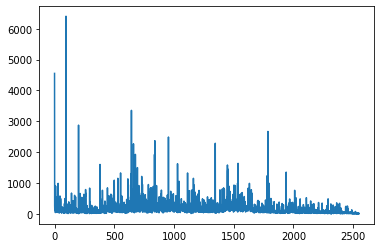

In [99]:
ted.comments.plot()

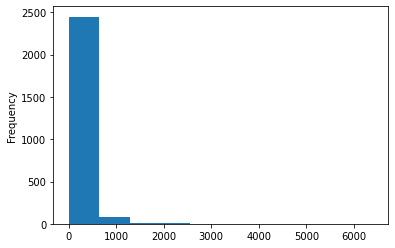

In [100]:
# histogram shows the frequency distribution of a single variable
ted.comments.plot(kind='hist')

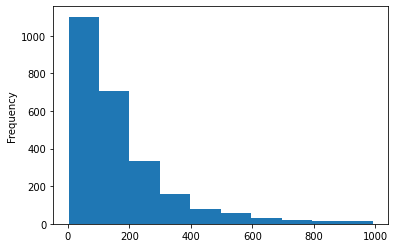

In [101]:
ted[ted.comments < 1000].comments.plot(kind='hist')

In [102]:
ted[ted.comments >= 1000].shape

(32, 24)

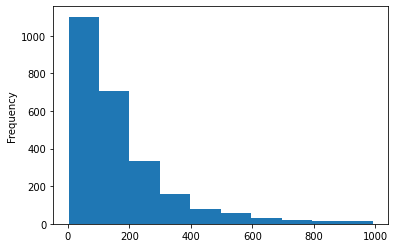

In [103]:
ted.query('comments < 1000').comments.plot(kind='hist')

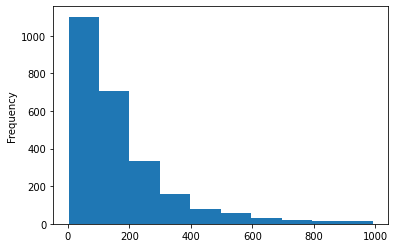

In [104]:
ted.loc[ted.comments < 1000, 'comments'].plot(kind='hist')

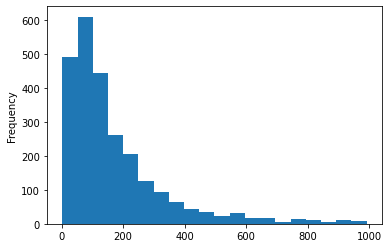

In [105]:
# increase the number of bins to see more detail
ted.loc[ted.comments < 1000, 'comments'].plot(kind='hist', bins=20)

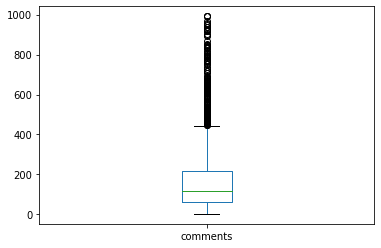

In [106]:
ted.loc[ted.comments < 1000, 'comments'].plot(kind='box')

## 4. Plot the number of talks that took place each year

Bonus exercise: calculate the average delay between filming and publishing

In [29]:
ted.event.sample(10)

1473           TED2013
1733           TED2014
177            TED2007
194            TED2002
1375      TEDxWinnipeg
1878    TEDGlobal 2014
1276    TEDGlobal 2012
675            TED2010
693            TEDxUSC
330            TED2005
Name: event, dtype: object

In [30]:
ted.film_date.head()

0    1140825600
1    1140825600
2    1140739200
3    1140912000
4    1140566400
Name: film_date, dtype: int64

In [31]:
pd.to_datetime(ted.film_date).head()

0   1970-01-01 00:00:01.140825600
1   1970-01-01 00:00:01.140825600
2   1970-01-01 00:00:01.140739200
3   1970-01-01 00:00:01.140912000
4   1970-01-01 00:00:01.140566400
Name: film_date, dtype: datetime64[ns]

In [32]:
pd.to_datetime(ted.film_date, unit='s').head()

0   2006-02-25
1   2006-02-25
2   2006-02-24
3   2006-02-26
4   2006-02-22
Name: film_date, dtype: datetime64[ns]

In [33]:
ted['film_datetime'] = pd.to_datetime(ted.film_date, unit='s')

In [34]:
ted[['event', 'film_datetime']].sample(5)

,event,film_datetime
602,TEDMED 2009,2009-10-25
1891,TED@BCG Berlin,2014-11-10
1380,TEDGlobal 2012,2012-06-26
1506,TEDSalon NY2013,2013-04-24
278,TED2008,2008-02-02


In [35]:
ted.dtypes

comments                       int64
description                   object
duration                       int64
event                         object
film_date                      int64
languages                      int64
main_speaker                  object
name                          object
num_speaker                    int64
published_date                 int64
ratings                       object
related_talks                 object
speaker_occupation            object
tags                          object
title                         object
url                           object
views                          int64
comments_per_view            float64
views_per_comment            float64
film_datetime         datetime64[ns]
dtype: object

In [36]:
ted.film_datetime.dt.year.head()

0    2006
1    2006
2    2006
3    2006
4    2006
Name: film_datetime, dtype: int64

In [37]:
ted.event.str.lower().head()

0    ted2006
1    ted2006
2    ted2006
3    ted2006
4    ted2006
Name: event, dtype: object

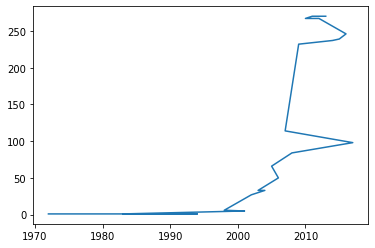

In [39]:
ted.film_datetime.dt.year.value_counts().plot()

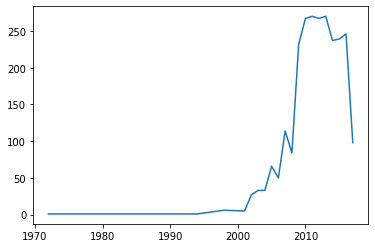

In [40]:
ted.film_datetime.dt.year.value_counts().sort_index().plot()

In [41]:
ted.film_datetime.max()

Timestamp('2017-08-27 00:00:00')

## 5. What were the "best" events in TED history to attend?

In [107]:
# count the number of talks each year
ted.event.value_counts().head()

TED2014    84
TED2009    83
TED2016    77
TED2013    77
TED2015    75
Name: event, dtype: int64

In [108]:
# use views as quality of talk
ted.groupby('event').views.mean().head()

event
AORN Congress                  149818.0
Arbejdsglaede Live             971594.0
BBC TV                         521974.0
Bowery Poetry Club             676741.0
Business Innovation Factory    304086.0
Name: views, dtype: float64

In [109]:
# find the largest values
ted.groupby('event').views.mean().sort_values().tail()

event
TEDxNorrkoping        6569493.0
TEDxCreativeCoast     8444981.0
TEDxBloomington       9484259.5
TEDxHouston          16140250.5
TEDxPuget Sound      34309432.0
Name: views, dtype: float64

In [110]:
ted.groupby('event').views.agg(['count', 'mean']).sort_values('mean').tail()

,count,mean
event,,
TEDxNorrkoping,1,6569493.0
TEDxCreativeCoast,1,8444981.0
TEDxBloomington,2,9484259.5
TEDxHouston,2,16140250.5
TEDxPuget Sound,1,34309432.0


In [111]:
# calculate the total views per event
ted.groupby('event').views.agg(['count', 'mean', 'sum']).sort_values('sum').tail()

,count,mean,sum
event,,,
TED2006,45,3.274345e+06,147345533
TED2015,75,2.011017e+06,150826305
TEDGlobal 2013,66,2.584163e+06,170554736
TED2014,84,2.072874e+06,174121423
TED2013,77,2.302700e+06,177307937
